In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [79]:
#表示される列数・行数を増やしておく
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",500)

In [34]:
#データの読み込み
boxscore=pd.read_csv("data/games_boxscore_202021.csv")
summary=pd.read_csv("data/games_summary_202021.csv")
teams=pd.read_csv("data/teams.csv")

In [35]:
#teamsからB1_202021シーズンのみを取り出す
teams=teams[teams["League"]=="B1"]
teams=teams[teams["Season"]=="2020-21"]
teams

,TeamId,Season,League,NameShort,NameLong,Division
144,702,2020-21,B1,北海道,レバンガ北海道,東地区
145,693,2020-21,B1,秋田,秋田ノーザンハピネッツ,東地区
146,703,2020-21,B1,宇都宮,宇都宮ブレックス,東地区
147,704,2020-21,B1,千葉,千葉ジェッツ,東地区
148,706,2020-21,B1,A東京,アルバルク東京,東地区
149,726,2020-21,B1,SR渋谷,サンロッカーズ渋谷,東地区
150,727,2020-21,B1,川崎,川崎ブレイブサンダース,東地区
151,694,2020-21,B1,横浜,横浜ビー・コルセアーズ,東地区
152,695,2020-21,B1,新潟,新潟アルビレックスBB,東地区
153,696,2020-21,B1,富山,富山グラウジーズ,東地区


In [36]:
#boxscoreとteamsをjoinして、B1_202021シーズンのデータセットを作る
boxscore=teams.merge(boxscore,on="TeamId")
boxscore

,TeamId,Season,League,NameShort,NameLong,Division,ScheduleKey,BoxType,PlayerId,Player,Number,Position,StarterBench,MIN,MIN.STR,PTS,FGM,FGA,F3GM,F3GA,FTM,FTA,OR,DR,TR,AS,TO,ST,BS,BSR,F,FD,DUNK,EFF
0,702,2020-21,B1,北海道,レバンガ北海道,東地区,5866,Total,8587,橋本竜馬,0,PG,Starter,15.37,15:22,0,0,1,0,1,0,0,1,0,1,3,1,0,0,0,4,0,0,-2
1,702,2020-21,B1,北海道,レバンガ北海道,東地区,5866,Total,8506,牧全,3,SG/SF,Bench,14.17,14:10,0,0,1,0,1,0,0,0,1,1,3,0,3,0,0,3,1,0,4
2,702,2020-21,B1,北海道,レバンガ北海道,東地区,5866,Total,15818,葛原大智,5,SG/SF,Starter,25.83,25:50,0,0,2,0,1,0,0,1,1,2,0,2,1,0,0,2,3,0,0
3,702,2020-21,B1,北海道,レバンガ北海道,東地区,5866,Total,20031,中野司,7,SG/SF,Starter,27.68,27:41,7,3,11,1,5,0,0,3,0,3,1,3,1,0,1,3,1,0,-2
4,702,2020-21,B1,北海道,レバンガ北海道,東地区,5866,Total,8507,多嶋朝飛,8,PG,Bench,24.63,24:38,4,2,7,0,3,0,0,0,2,2,1,5,1,0,1,2,3,0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13334,701,2020-21,B1,琉球,琉球ゴールデンキングス,西地区,6389,Total,14302,今村佳太,30,SG/SF,Bench,26.38,26:23,15,5,9,4,8,1,2,0,2,2,1,2,2,0,0,2,1,0,12
13335,701,2020-21,B1,琉球,琉球ゴールデンキングス,西地区,6389,Total,8662,満原優樹,32,C/PF,Bench,8.67,08:40,0,0,2,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,-2
13336,701,2020-21,B1,琉球,琉球ゴールデンキングス,西地区,6389,Total,33096,キム・ティリ,41,C/PF,Bench,15.90,15:54,0,0,4,0,4,0,0,0,3,3,1,0,0,0,0,0,0,0,0
13337,701,2020-21,B1,琉球,琉球ゴールデンキングス,西地区,6389,Total,26914,ジャック・クーリー,45,C,Starter,23.58,23:35,10,4,8,0,0,2,2,3,7,10,2,2,0,0,0,3,4,0,17


In [37]:
#summaryとteamsをjoinして、B1_202021シーズンのデータセットを作る
summary=teams.merge(summary,on="TeamId")
summary

,TeamId,Season,League,NameShort,NameLong,Division,ScheduleKey,PTS,Q1,Q2,Q3,Q4,OT1,OT2,OT3,OT4,F2GM,F2GA,F3GM,F3GA,FTM,FTA,OR,DR,TR,AS,TO,ST,BS,F,PtsBiggestLead,PtsInPaint,PtsFastBreak,PtsSecondChance,PtsFromTurnover,BiggestScoringRun,LeadChanges,TimesTied
0,702,2020-21,B1,北海道,レバンガ北海道,東地区,5866,54,11,14,18,11,0,0,0,0,19,42,4,21,4,6,13,16,29,10,13,8,0,27,2,30,10,15,14,7-0(63-41),2,0
1,702,2020-21,B1,北海道,レバンガ北海道,東地区,5867,78,23,17,9,29,0,0,0,0,22,41,7,21,13,19,9,28,37,12,14,9,3,18,15,32,9,9,20,12-0(64-78),4,3
2,702,2020-21,B1,北海道,レバンガ北海道,東地区,5944,76,19,10,29,18,0,0,0,0,17,41,9,19,15,18,7,21,28,15,8,2,1,23,0,34,4,5,10,6-0(16-11),0,0
3,702,2020-21,B1,北海道,レバンガ北海道,東地区,5977,90,21,24,15,20,10,0,0,0,21,41,10,26,18,21,8,23,31,26,11,9,1,24,20,28,15,4,17,8-0(4-10),1,2
4,702,2020-21,B1,北海道,レバンガ北海道,東地区,5881,84,16,23,23,22,0,0,0,0,25,51,5,22,19,22,11,25,36,15,6,9,1,26,4,40,3,8,15,6-0(41-43),5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,701,2020-21,B1,琉球,琉球ゴールデンキングス,西地区,6332,87,24,30,16,17,0,0,0,0,21,42,10,31,15,22,16,25,41,17,10,4,1,28,9,32,10,17,9,8-0(48-40),6,6
1144,701,2020-21,B1,琉球,琉球ゴールデンキングス,西地区,6233,85,27,16,19,23,0,0,0,0,27,52,9,23,4,7,14,24,38,17,11,7,2,18,8,42,9,7,6,7-0(7-3),3,0
1145,701,2020-21,B1,琉球,琉球ゴールデンキングス,西地区,6448,70,10,18,22,20,0,0,0,0,22,48,5,32,11,13,24,29,53,13,10,7,0,21,4,34,4,27,13,10-0(57-57),0,1
1146,701,2020-21,B1,琉球,琉球ゴールデンキングス,西地区,6449,88,13,15,22,25,13,0,0,0,28,48,7,22,11,13,10,21,31,25,10,9,1,26,1,40,4,6,16,18-0(62-61),0,1


In [41]:
#boxscoreで選手名でgroupbyして平均スタッツを算出する
boxscore=boxscore.groupby("Player").mean()
boxscore

,TeamId,ScheduleKey,PlayerId,Number,MIN,PTS,FGM,FGA,F3GM,F3GA,FTM,FTA,OR,DR,TR,AS,TO,ST,BS,BSR,F,FD,DUNK,EFF
Player,,,,,,,,,,,,,,,,,,,,,,,,
LJ・ピーク,703.0,6160.189655,3.298900e+04,5.0,20.099655,11.396552,4.103448,8.724138,1.689655,4.310345,1.500000,2.172414,0.586207,1.620690,2.206897,1.672414,0.913793,0.810345,0.206897,0.206897,1.862069,2.155172,0.0,10.172414
アイザイア・マーフィー,721.0,6137.618182,3.299500e+04,5.0,24.027273,9.527273,3.472727,8.781818,0.981818,3.163636,1.600000,2.345455,0.290909,2.309091,2.600000,2.072727,1.818182,0.963636,0.654545,0.327273,1.654545,2.218182,0.0,8.181818
アイラ・ブラウン,700.0,6130.537037,8.452000e+03,33.0,31.810185,14.092593,5.518519,11.222222,0.666667,2.055556,2.388889,3.833333,2.074074,5.259259,7.333333,3.000000,1.796296,1.259259,0.962963,0.370370,2.296296,3.629630,0.0,18.611111
アキ・チェンバース,694.0,6139.807692,8.448000e+03,10.0,25.136923,9.384615,3.653846,8.346154,1.346154,4.000000,0.730769,0.903846,0.692308,1.923077,2.615385,1.865385,1.076923,0.730769,0.076923,0.192308,1.730769,1.230769,0.0,8.038462
アレックス・カーク,706.0,6026.371429,1.258200e+04,53.0,28.848857,17.085714,6.400000,11.657143,0.400000,1.171429,3.885714,4.828571,3.371429,6.314286,9.657143,1.485714,0.914286,0.571429,1.000000,0.285714,1.742857,4.314286,0.0,24.971429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
高原晟也,700.0,6134.571429,5.100000e+09,11.0,4.714286,1.714286,0.714286,1.285714,0.142857,0.714286,0.142857,0.285714,0.142857,0.285714,0.428571,0.142857,0.142857,0.142857,0.000000,0.000000,0.714286,0.285714,0.0,1.142857
高島紳司,700.0,6261.727273,5.100000e+09,12.0,15.682727,4.363636,1.545455,3.727273,1.000000,2.272727,0.272727,0.363636,0.636364,0.363636,1.000000,1.090909,0.000000,0.363636,0.090909,0.090909,1.363636,0.272727,0.0,3.454545
高橋耕陽,728.0,6134.018182,1.081800e+04,8.0,8.992000,3.363636,1.290909,3.181818,0.527273,1.636364,0.254545,0.363636,0.181818,0.509091,0.690909,0.709091,0.672727,0.181818,0.018182,0.109091,0.690909,0.509091,0.0,2.000000


In [44]:
#summaryでチーム名でgroupbyして平均スタッツを算出する
summary=summary.groupby("NameShort").mean()
summary

In [49]:
#インデックスをリセットする
boxscore=boxscore.reset_index()
summary=summary.reset_index()

In [56]:
#boxscoreに効率に関するスタッツを追加する
#まずeFG
eFG=[]
for fgm,f3gm,fga in zip(boxscore["FGM"],boxscore["F3GM"],boxscore["FGA"]):
    if fga==0:
        eFG.append(np.nan)
    else:
        eFG.append((fgm+0.5*f3gm)/fga)

boxscore["eFG"]=eFG

In [59]:
#boxscoreに効率に関するスタッツを追加する
#次にTS%
TS=[]
for pts,fga,fta in zip(boxscore["PTS"],boxscore["FGA"],boxscore["FTA"]):
    if 2*(fga+(0.44*fta))==0:
        TS.append(np.nan)
    else:
        TS.append(pts/(2*(fga+(0.44*fta))))

boxscore["TS%"]=TS

In [65]:
#USG%の分子を計算してboxscoreに追加する
usg=[]
for fga,fta,to in zip(boxscore["FGA"],boxscore["FTA"],boxscore["TO"]):
    usg.append(fga+(0.44*fta)+to)
    
boxscore["usg"]=usg

In [67]:
#boxscoreから必要な列だけ抽出する
boxscore=boxscore.loc[:,["Player","MIN","TeamId","eFG","TS%","usg"]]

In [70]:
#summaryからPOSSを計算する
poss=[]
for f2ga,f3ga,fta,orb,to in zip(summary["F2GA"],summary["F3GA"],summary["FTA"],summary["OR"],summary["TO"]):
    fga=f2ga+f3ga
    poss.append(fga+fta*0.44-orb+to)
summary["POSS"]=poss

In [73]:
#summaryから必要な列だけを抽出する
summary=summary.loc[:,["NameShort","TeamId","POSS"]]

In [84]:
#boxscoreのTeamIdでなぜか小数点以下が出現するので切り捨てる
ID=[]

for teamid in boxscore["TeamId"]:
    teamid=math.floor(teamid)
    ID.append(teamid)
    
boxscore["TeamId"]=ID

In [85]:
#boxscoreとsummaryをTeamIdでjoinする
data=summary.merge(boxscore,on="TeamId")
data

,NameShort,TeamId,POSS,Player,MIN,eFG,TS%,usg
0,A東京,706.0,71.314286,アレックス・カーク,28.848857,0.566176,0.619869,14.696000
1,A東京,706.0,71.314286,カイル・バローン,9.229000,0.604167,0.633803,3.440000
2,A東京,706.0,71.314286,ケビン・ジョーンズ,28.915745,0.608411,0.625456,13.441702
3,A東京,706.0,71.314286,ザック・バランスキー,15.536786,0.477528,0.495863,3.795714
4,A東京,706.0,71.314286,ジャマール・ソープ,8.935714,0.571429,0.650212,3.262857
5,A東京,706.0,71.314286,デション・トーマス,24.660000,0.538321,0.588078,15.158222
6,A東京,706.0,71.314286,マーク・セントフォート,11.483913,0.618557,0.678165,6.410435
7,A東京,706.0,71.314286,吉井裕鷹,0.000000,NaN,NaN,0.000000
8,A東京,706.0,71.314286,安藤誓哉,22.686429,0.513430,0.547348,10.875000
9,A東京,706.0,71.314286,小島元基,13.945179,0.593407,0.608897,4.405714


In [87]:
#USG%を計算してdataに追加する
USG=[]
for poss, usg in zip(data["POSS"],data["usg"]):
    USG.append(usg/poss)
    
data["USG%"]=USG

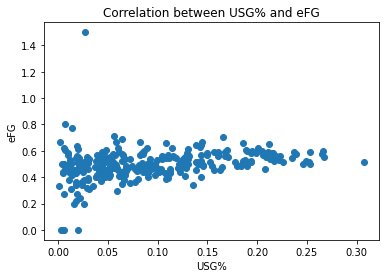

USG%とeFGの相関係数は、0.29537649312422437


In [102]:
#USG%とeFGの相関を調べる
plt.plot(data["USG%"],data["eFG"],"o")
plt.title("Correlation between USG% and eFG")
plt.ylabel("eFG")
plt.xlabel("USG%")
plt.show()

print("USG%とeFGの相関係数は、"+str(data["USG%"].corr(data["eFG"])))

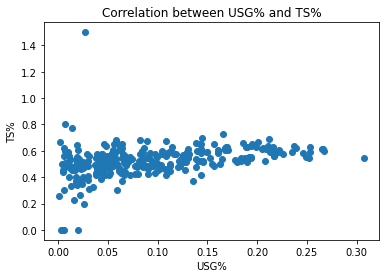

USG%とTS%の相関係数は、0.35589732870946145


In [101]:
#USG%とTS%の相関を調べる
plt.plot(data["USG%"],data["TS%"],"o")
plt.title("Correlation between USG% and TS%")
plt.ylabel("TS%")
plt.xlabel("USG%")
plt.show()

print("USG%とTS%の相関係数は、"+str(data["USG%"].corr(data["TS%"])))